In [3]:
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle
from scipy.stats import norm as gaussian

In [10]:
# activations = ('Tanh', 'ReLU',)
activations = ('ReLU',)
# ini_modes = ('default', 'layer-by-layer',)
ini_modes = ('default',)
data = {activation : {mode : {} for mode in ini_modes} for activation in activations}
checkpoint_loss = (2.000000, 1.500000, 1.000000, 0.500000)
for activation in activations:
    for ini_mode in ini_modes:
        for loss in checkpoint_loss:
            data[activation][ini_mode][loss] = \
                pickle.load(open('training-gradient-loss-%f' % loss, 'rb'))

In [11]:
import numpy as np

fullyconnected0_weight 0.000710702
fullyconnected1_weight 0.000791866
fullyconnected2_weight 0.00101342
fullyconnected3_weight 0.00122048
fullyconnected4_weight 0.0148261
fullyconnected0_weight 0.000575577
fullyconnected1_weight 0.000638491
fullyconnected2_weight 0.000842639
fullyconnected3_weight 0.00102699
fullyconnected4_weight 0.0122933
fullyconnected0_weight 0.00100843
fullyconnected1_weight 0.00113991
fullyconnected2_weight 0.00134126
fullyconnected3_weight 0.00134943
fullyconnected4_weight 0.0146219
fullyconnected0_weight 0.00102223
fullyconnected1_weight 0.00124426
fullyconnected2_weight 0.00129015
fullyconnected3_weight 0.00112617
fullyconnected4_weight 0.0113307


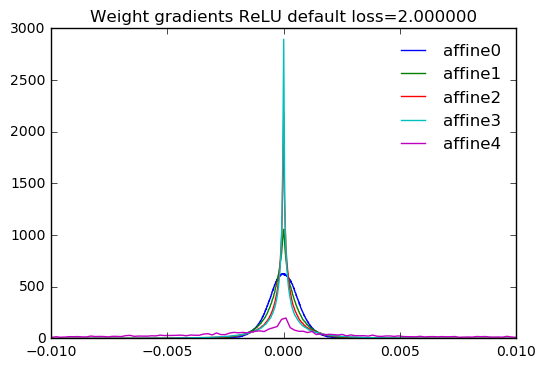

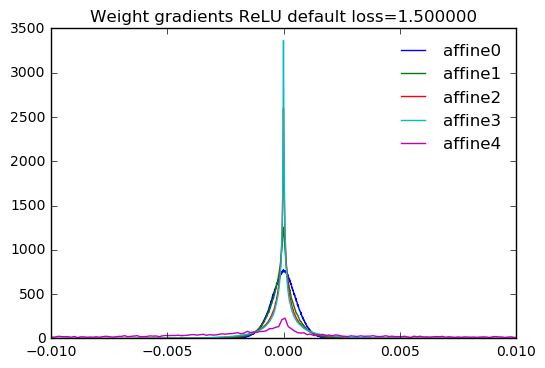

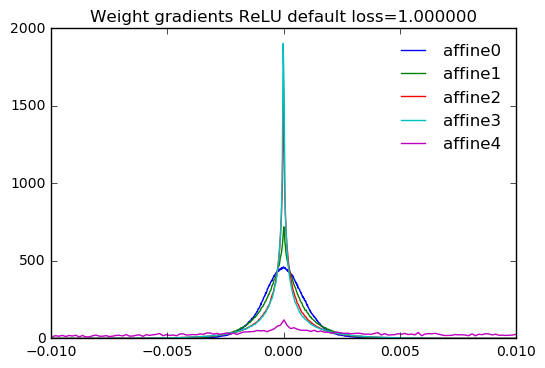

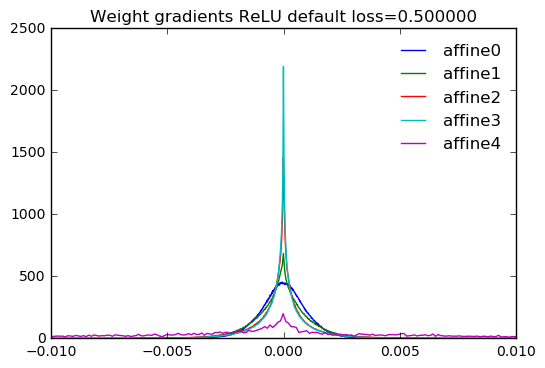

In [12]:
for activation in activations:
    for ini_mode in ini_modes:
        for loss in checkpoint_loss:
            gradients = data[activation][ini_mode][loss]
            pl.figure()
            for key in sorted(gradients.keys()):
                value = gradients[key]
                if 'weight' in key:
                    print key, np.std(value)
                    key = key.replace('fullyconnected', 'affine').replace('_weight', '')
                    densities, edges = np.histogram(value.flatten(), bins=1024, normed=True)
                    centers = 0.5 * (edges[:-1] + edges[1:])
                    pl.plot(centers, densities, label=key)
                    pl.xlim(-0.01, 0.01)
            pl.legend(framealpha=0, loc='upper right')
            pl.title('Weight gradients %s %s loss=%f' % (activation, ini_mode, loss))